# EDA-Gorjetas

## Importando bibliotecas

In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ranksums

# Carregando dados

In [3]:
dados = pd.read_csv('dados/tips.csv')

# Tradução
label_colunas = {
    'total_bill': 'valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day': 'dia_da_semana', 
    'time': 'hora_do_dia', 
    'size': 'total_de_pessoas'
}
sim_nao = {
    'No': 'Não', 
    'Yes': 'Sim'
}
dias = {
    'Sun': 'Domingo', 
    'Sat': 'Sábado', 
    'Thur': 'Quinta', 
    'Fri': 'Sexta'
}

label_periodo = {
    'Dinner': 'Jantar', 
    'Lunch': 'Almoço'
}

gorjetas = dados.rename(columns = label_colunas)

gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(label_periodo)

## Análise 1 - Valor da conta e gorjetas

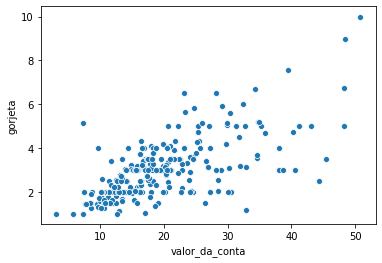

In [4]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas,)

* Visualmente, o valor da gorjeta aumenta conforme o valor da conta

In [5]:
print(f'A base de dados possui {gorjetas.shape[0]} registros.\n')
print('Registros não nulos:')
gorjetas.count()

A base de dados possui 244 registros.

Registros não nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [68]:
gorjetas['porcentagem'] = (gorjetas['gorjeta'] / gorjetas['valor_da_conta'] ).round(2)

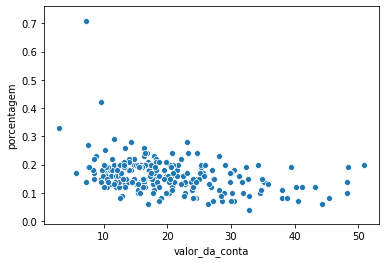

In [69]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data = gorjetas)

* Visualmente o valor da conta não é proporcional ao valor da gorjeta

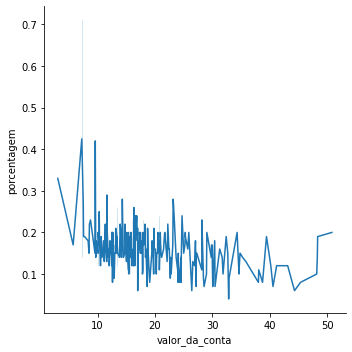

In [70]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem' , data = gorjetas, kind='line')

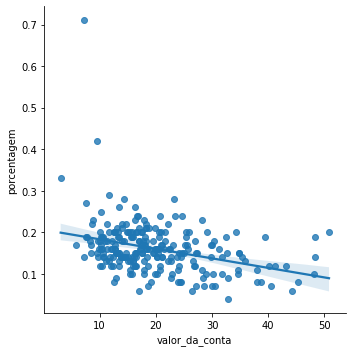

In [71]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data = gorjetas)

## Análise Sobremesa

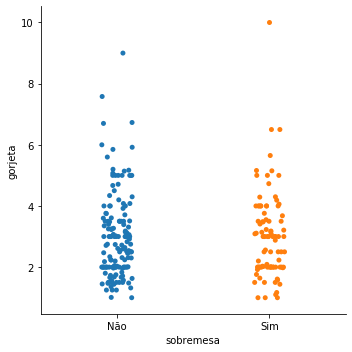

In [72]:
sns.catplot(x='sobremesa',y='gorjeta', data = gorjetas)

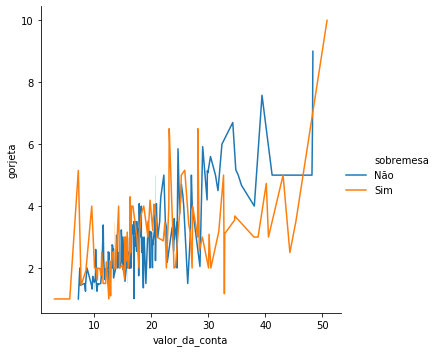

In [73]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', kind='line', data = gorjetas)

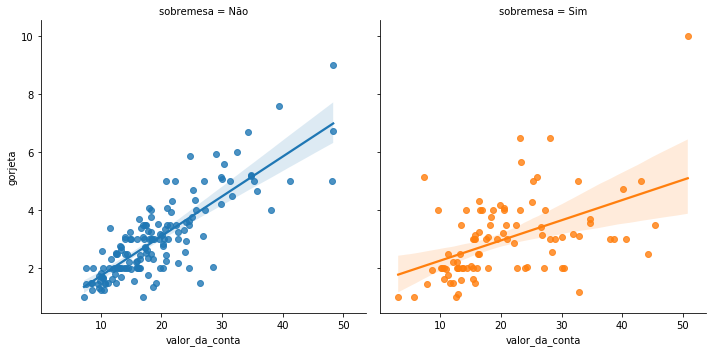

In [74]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data = gorjetas)

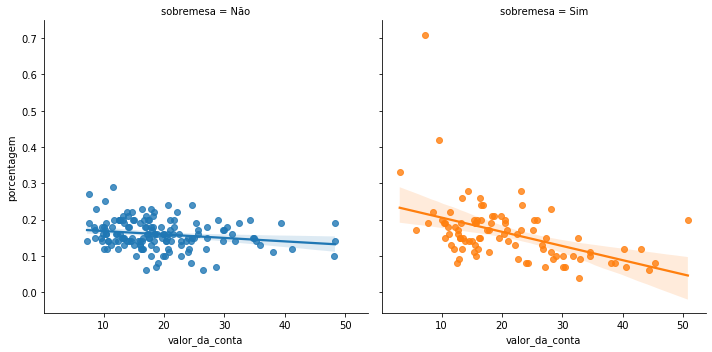

In [75]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data = gorjetas)

## Teste de Hipótese

**H<sup>null</sup>**
**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

In [76]:
sobremesa = gorjetas.query("sobremesa=='Sim'").porcentagem

**H<sup>alt</sup>**
**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [77]:
sem_sobremesa = gorjetas.query("sobremesa=='Não'").porcentagem

In [78]:
r = ranksums(sobremesa, sem_sobremesa)
print(f'O valor do p-value é {r.pvalue}')
print('A distribuição da taxa da gorjeta é a mesma nos dois grupos')

O valor do p-value é 0.5266635660124415
A distribuição da taxa da gorjeta é a mesma nos dois grupos


## Análise 3: Dias da Semana

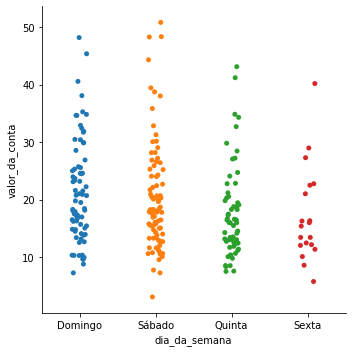

In [79]:
sns.catplot(x='dia_da_semana', y = 'valor_da_conta', data = gorjetas)

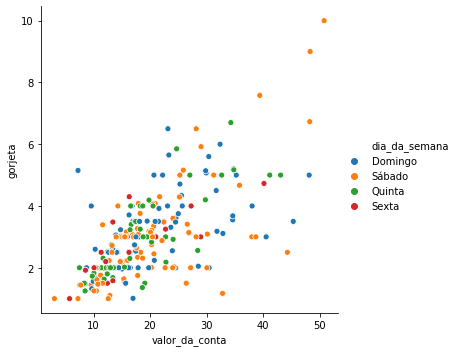

In [80]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue = 'dia_da_semana', data=gorjetas)

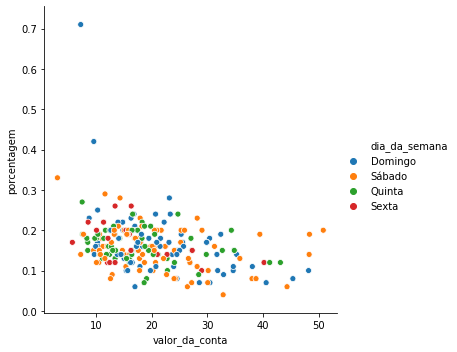

In [81]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue = 'dia_da_semana', data=gorjetas)

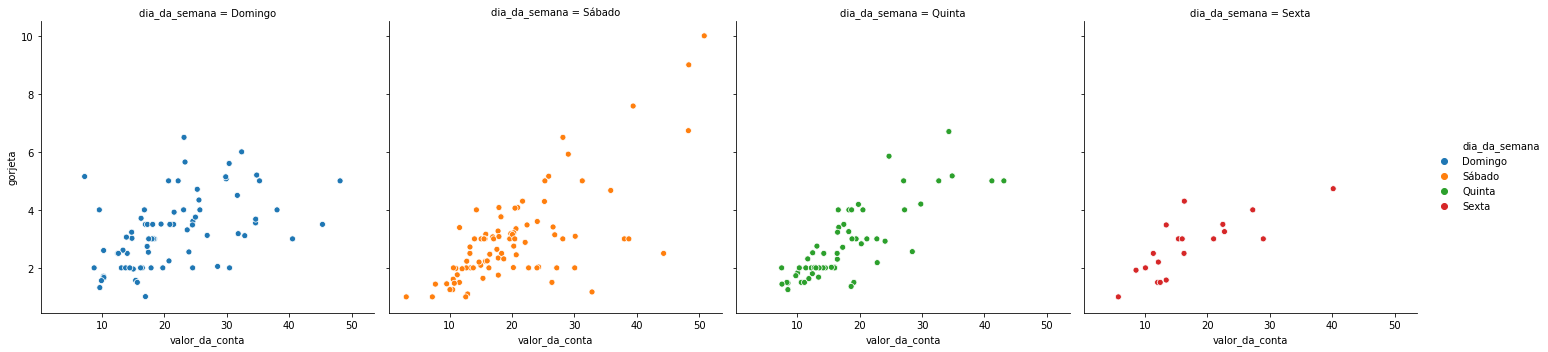

In [82]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas, col='dia_da_semana')

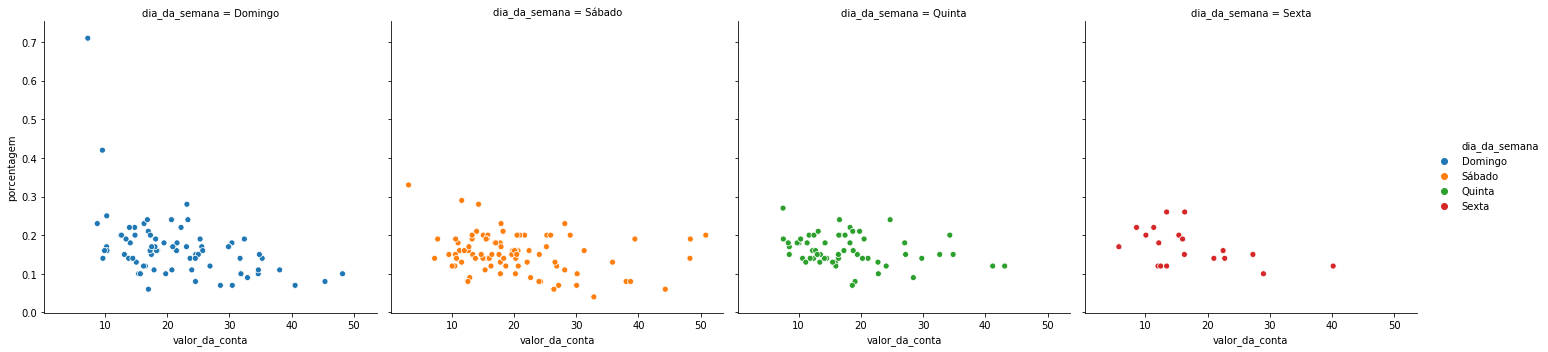

In [83]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas, col='dia_da_semana')

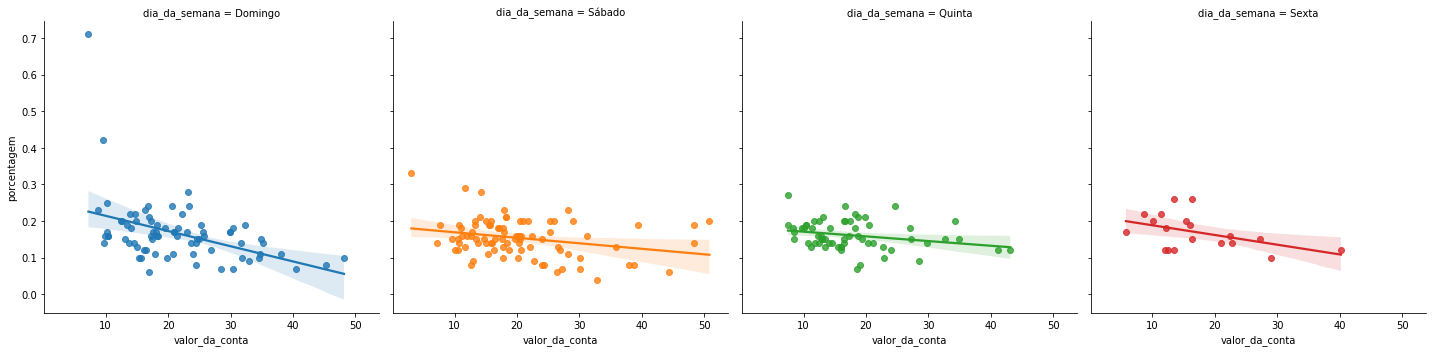

In [84]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas, col='dia_da_semana')

In [85]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

gorjetas.groupby('dia_da_semana').mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [86]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [88]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**: **A distribuição do valor da conta é igual no sábado e domingo**

In [98]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

**H<sup>alt</sup>**: **A distribuição do valor da conta não é igual no sábado e domingo**

In [99]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [101]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


Se o valor do pvalue fosse maior que 0.05, não aceitamos a hipótese alternativa, como é menor, continuamos co a hipótese nula

## Análise 4 - Hora do dia

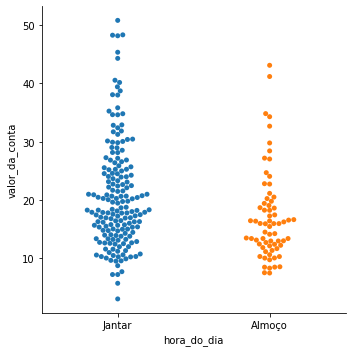

In [105]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data = gorjetas)

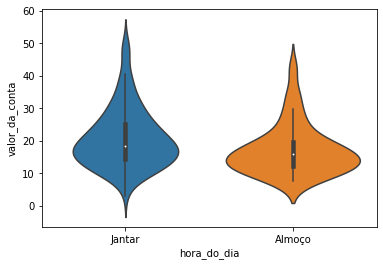

In [106]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

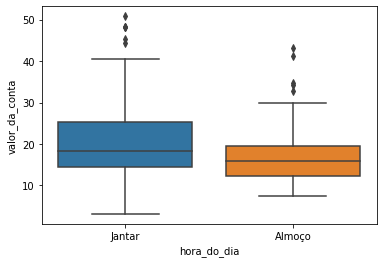

In [107]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [109]:
almoco = gorjetas.query("hora_do_dia=='Almoço'").valor_da_conta
jantar = gorjetas.query("hora_do_dia=='Jantar'").valor_da_conta

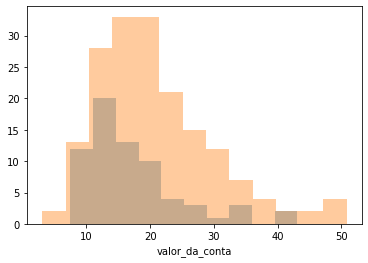

In [113]:
sns.distplot(almoco, kde=False)
sns.distplot(jantar, kde=False)

## Teste de Hipótese

**H<sup>null</sup>**: A distribuição do valor da conta é igual no almoço e no jantar<br>
**H<sup>alt</sup>**: A distribuição do valor da conta não é igual no almoço e no jantar

In [119]:
ranksums(jantar, almoco)

# Como o pvalue é menor que 0,05, concluímos que a hipótese alternativa é válida.

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

In [116]:
gorjetas.groupby('hora_do_dia').mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de Hipótese da porcentagem da gorjeta

**H<sup>null</sup>**: A distribuição da porcentagem da gorjeta é igual no almoço e no jantar<br>
**H<sup>alt</sup>**: A distribuição da porcentagem da gorjeta não é igual no almoço e no jantar

In [121]:
# Outro teste com a hipotese alternativa mas, com a porcentagem
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_jantar = gorjetas.query("hora_do_dia =='Jantar'").porcentagem

In [125]:
ranksums(porcentagem_almoco, porcentagem_jantar)

# A distribuição da taxa de gorjeta é igual. hipótese nula

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)